In [1]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#the time is in duration (timedelta) format so that needs to be changed in the future
#here i load the libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [2]:
January=pd.read_csv('January.csv')
January.drop('Unnamed: 0',axis=1,inplace=True)
January.info()
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 416.5+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31T22:58:00Z,2016-01-31T22:58:00Z,PT0S
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31T23:01:00Z,2016-01-31T23:01:00Z,PT0S


In [3]:
#First I make a date from the date planned departure, then i make it a string in a new column so i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
January['Train Departure Planned']=pd.to_datetime(January['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Planned1']=January['Train Departure Planned'].astype(str)
January[['DepartureDatePlanned','DepartureTimePlanned']]= January['Train Departure Planned1'].str.split(' ', expand = True)
January['DepartureDatePlanned']=pd.to_datetime(January['DepartureDatePlanned'])
January
#then i make the planned depature time a time delta (Actually want to make it a normal time format)
January['DepartureTimePlanned'] = January.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
January.drop('Train Departure Planned1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 499.8+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31T22:58:00Z,PT0S,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31T23:01:00Z,PT0S,2016-01-31,00:00:00


In [4]:
# here i basically do the same but for the actual depature
January['Train Departure Actual']=pd.to_datetime(January['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Actual1']=January['Train Departure Actual'].astype(str)
January[['DepartureDateActual','DepartureTimeActual']]= January['Train Departure Actual1'].str.split(' ', expand = True)
January['DepartureDateActual']=pd.to_datetime(January['DepartureDateActual'])
January
January['DepartureTimeActual'] = January.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
January.drop('Train Departure Actual1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     datetime64[ns]
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
 12  DepartureDateActual        datetime64[ns]
 13  DepartureTimeActual        object        
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 583.1+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00


In [5]:
#Then i also put the delay in time delta format
January['Train Delay']=pd.to_timedelta(January['Train Delay'].str.strip())
January

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00


# Amount of delay per day and average amount of delay per weekday
Here we will calculate how many times there is a delay for every day and what the average delay is per weekday (monday until friday)

In [40]:
#Add a column for the day of the week
January['day_of_week'] = January['DepartureDatePlanned'].dt.day_name()

In [46]:
from datetime import timedelta

#For now, we will call it a delay when there is a minimum delay of 2 minutes
#Example: 5 seconds delay, will not be called a delay, but 2 minutes will
delta = timedelta(
    minutes=2,
)

#Calculate how many delays each date will have
amountDelays = January[January['Train Delay'] >= delta].groupby(['DepartureDatePlanned'])['Train Delay'].count().reset_index()
amountDelays = amountDelays.sort_values(by="DepartureDatePlanned", ascending=True)

#Add the day of the week
amountDelays['day_of_week'] = amountDelays['DepartureDatePlanned'].dt.day_name()

amountDelays

,DepartureDatePlanned,Train Delay,day_of_week
0,2015-12-31,4,Thursday
1,2016-01-01,14864,Friday
2,2016-01-02,14865,Saturday
3,2016-01-03,18325,Sunday
4,2016-01-04,38993,Monday
5,2016-01-05,38922,Tuesday
6,2016-01-06,30493,Wednesday
7,2016-01-07,37177,Thursday
8,2016-01-08,39782,Friday
9,2016-01-09,19161,Saturday


<BarContainer object of 33 artists>

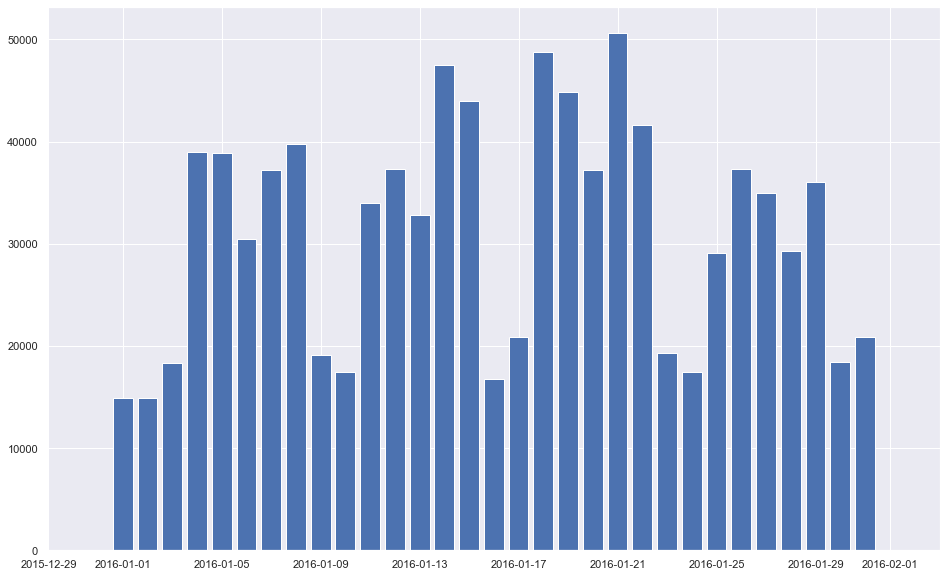

In [47]:
plt.figure(figsize=(16,10))
plt.bar(amountDelays['DepartureDatePlanned'],amountDelays['Train Delay'])

Here we see how many delays each date has, where the weekends have the least amount of delays but this doesn't show anything about how long the delays took

  day_of_week               Train Delay
6   Wednesday 0 days 00:05:03.375334739
5     Tuesday 0 days 00:05:11.926832543
0      Friday 0 days 00:05:23.311341189
3      Sunday 0 days 00:05:23.594072949
4    Thursday 0 days 00:05:24.643912482
1      Monday 0 days 00:05:34.798962708
2    Saturday 0 days 00:07:06.171160421


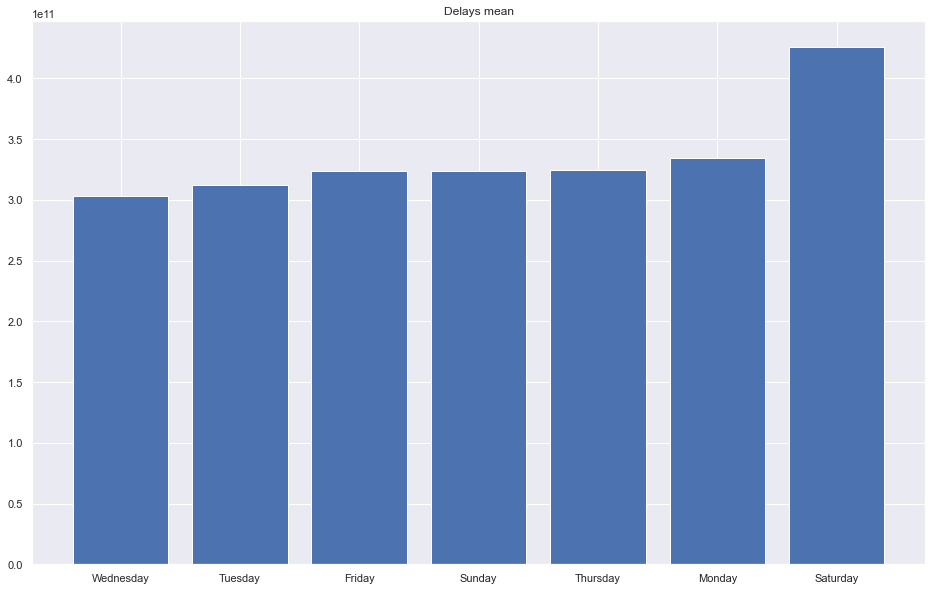

In [48]:
amountDelaysPerDay = January[January['Train Delay'] > delta].groupby(['day_of_week'])['Train Delay'].mean().reset_index().sort_values(by=['Train Delay'])
print(amountDelaysPerDay)

plt.figure(figsize=(16,10))
plt.bar(amountDelaysPerDay['day_of_week'],amountDelaysPerDay['Train Delay'])
plt.title('Delays mean')
plt.show()

We can see the average delay for each weekday in Jarnuary. The average delay on Saturday is higher than the rest of the days.